# Seaborn 

*  Seaborn is a statical plotting library 
*  It has default beautiful styles 
*  It aso is designed to work very well with pandas datafram objects 

# Distribution Plots

The distplot shows the distribution of a univariate set of observations.

In [76]:
import seaborn as sns

In [77]:
%matplotlib inline

In [78]:
tips=sns.load_dataset('tips')

In [79]:
tips = sns.load_dataset('tips')

In [80]:
print(sns.utils.get_data_home())   # To check The Path of your Data 

C:\Users\sujitd\seaborn-data


In [81]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


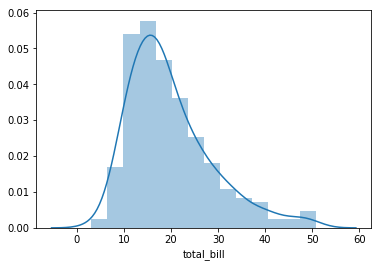

In [82]:
sns.distplot(tips['total_bill'])

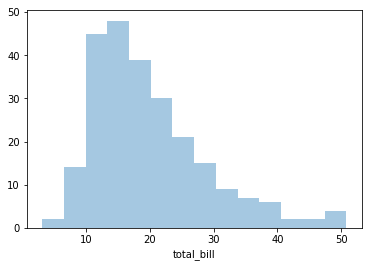

In [83]:
sns.distplot(tips['total_bill'],kde=False)

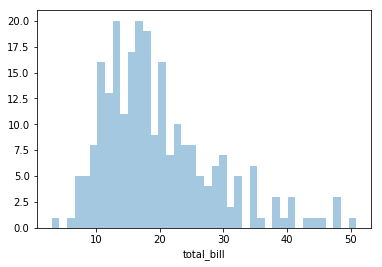

In [84]:
sns.distplot(tips['total_bill'],kde=False,bins=40)

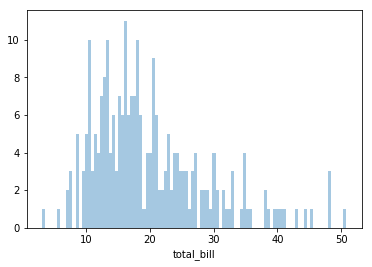

In [85]:
sns.distplot(tips['total_bill'],kde=False,bins=100)

## Joints Plots
jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

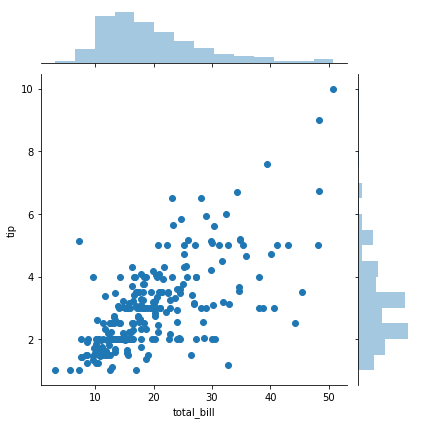

In [86]:
sns.jointplot(x='total_bill',y='tip',data=tips)

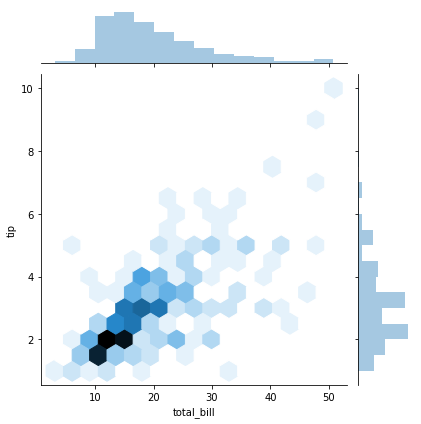

In [87]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex') 

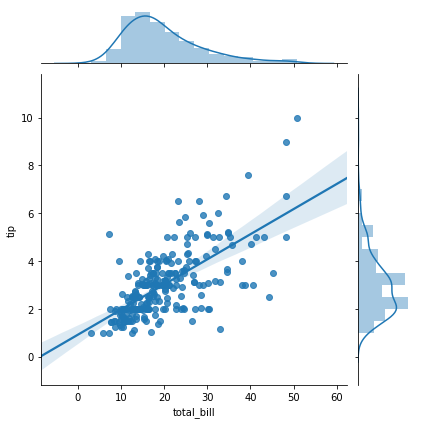

In [88]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') # Regression

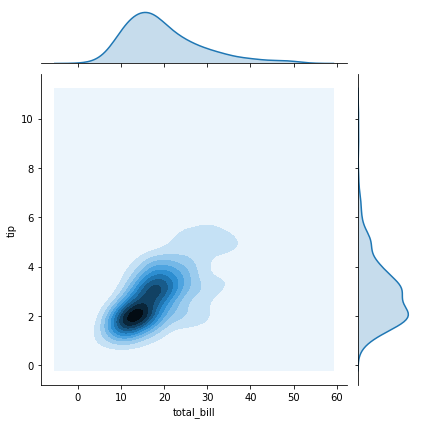

In [89]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde') # KDE = 2D 

## Pairplot

* plot pairwise relationship across entire datframe on NUmerical columns
* to Print categorical column in pairplot use HUE
* pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

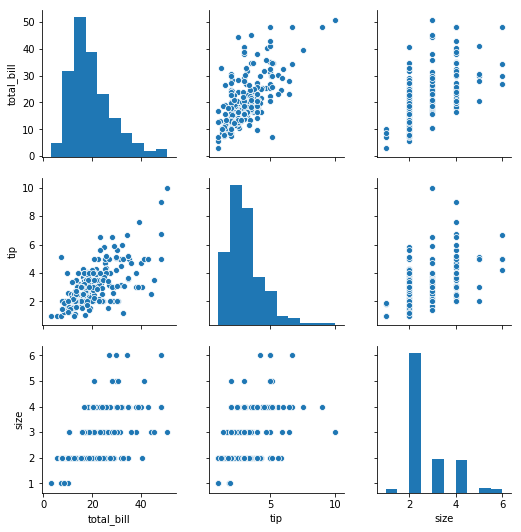

In [90]:
sns.pairplot(tips)

In [91]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


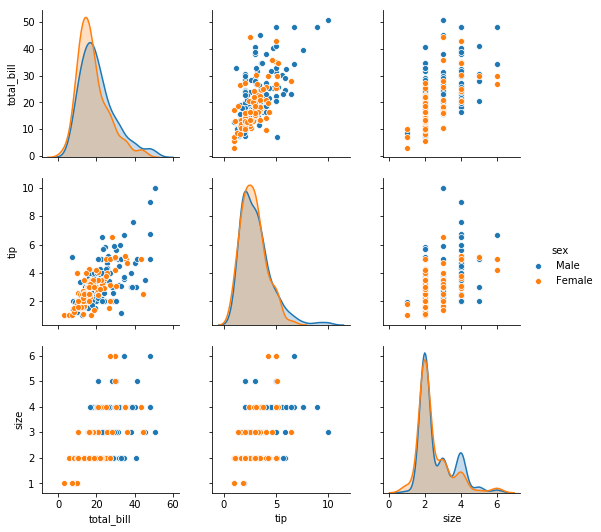

In [92]:
sns.pairplot(tips,hue='sex')

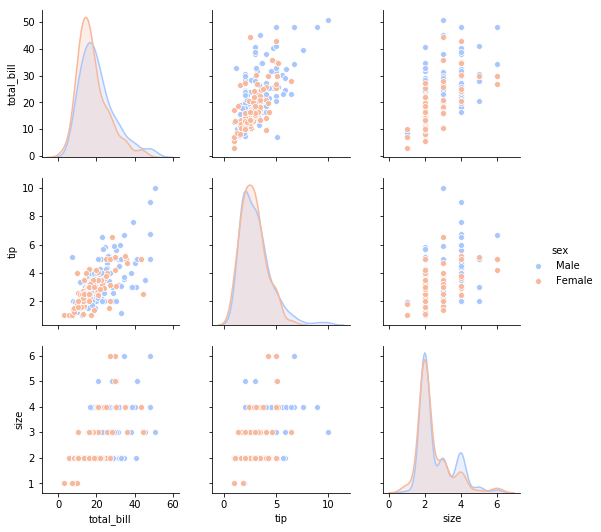

In [93]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## Rugplot
* it draw the DASH mark for every points on Univarint data 
* rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

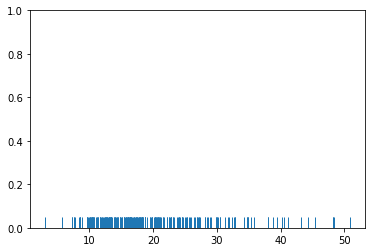

In [94]:
sns.rugplot(tips['total_bill'])

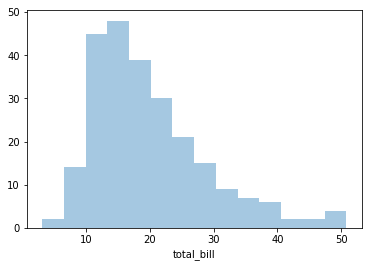

In [95]:
sns.distplot(tips['total_bill'],kde=False)   # KDE =Kernel Density Estimates

## KDE plot

##### Draw KDE(Kernel Density Estimates) grapth on rugplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

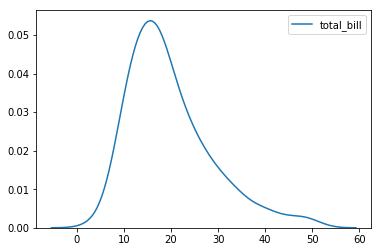

In [96]:
sns.kdeplot(tips['total_bill'])

(0, 1)

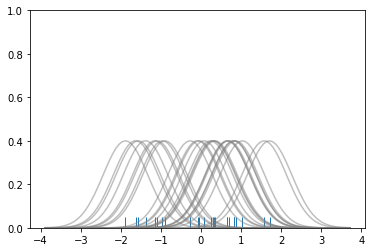

In [97]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

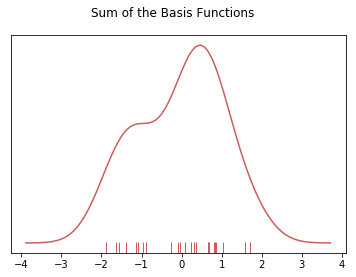

In [98]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")